Loading required packages and setting path for required data files.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from pandas import Series, read_csv, DataFrame, concat, Grouper, TimeGrouper
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.stats.stattools import durbin_watson
from datetime import datetime

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
sns.set()
%matplotlib inline

import os
# os.chdir('C:/Users/Sid/Desktop/TimeSeries/Day2/Faculty_Notebook')

So far we have seen how to visualize and study underlying patterns in a time series. In this lab we shall discuss the considerations in selecting the forecasting method and comparing them. To do this we need to set up mesures of frecasting accuracy. We will now study the different measures of accuracy using a sample dataset named gasoline. This data is available in the excel workbook called gasoline.xlsx. This workbook contains two sheets. Our current interest is the sheet called gasoline.

In [3]:
# read the datafile - weekly gasoline sales.

fc_data = pd.read_excel('gasoline.xlsx', sheet_name = 'gasoline')
print(fc_data)

    week  sales
0      1     17
1      2     21
2      3     19
3      4     23
4      5     18
5      6     16
6      7     20
7      8     18
8      9     22
9     10     20
10    11     15
11    12     22


Text(0.5, 1.0, 'Time series plot of weelky gasoline sales')

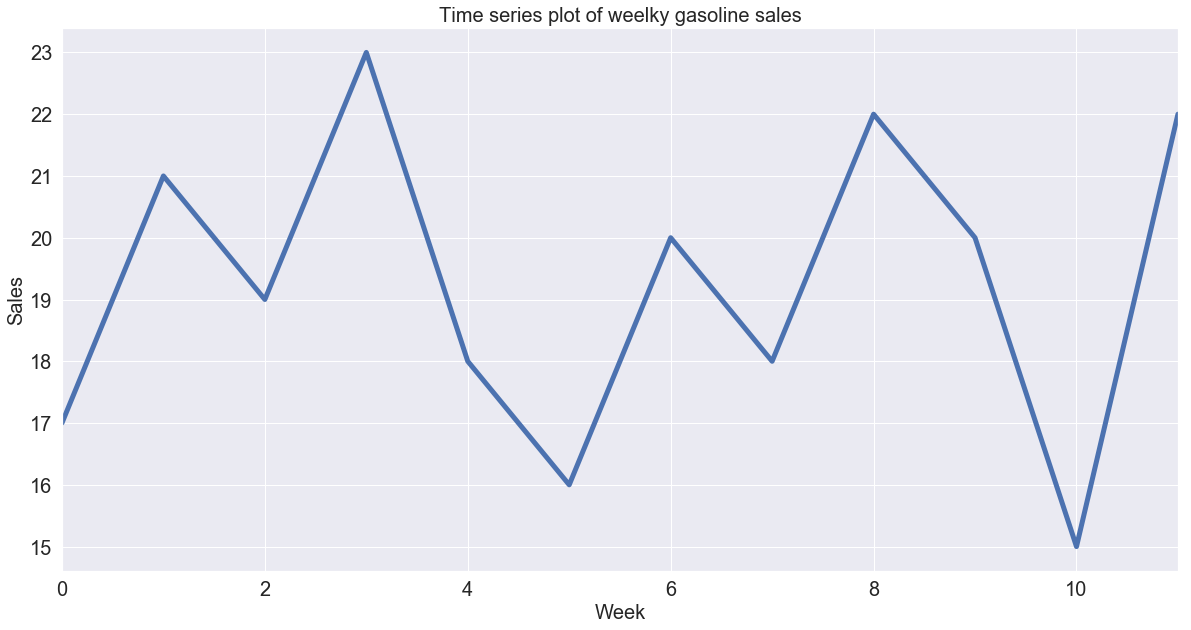

In [4]:
# plot the time series data

fc_data.sales.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Week', fontsize=20)
plt.ylabel('Sales', fontsize = 20)
plt.title('Time series plot of weelky gasoline sales', fontsize = 20)

Forecast error is defined as difference between observed value and predicted value at a given time point (x value). In naive method, the immediate preceding value is used as the pedicted value. Forecast accuracy measures are defined as follows:

Forecast error = Observed value - Forecast value at a given time point.
Mean Absolute Error = MAE = average of absolure value of forecast error.
Mean Squared Error = MSE = average of squared forecast errors.
Root Meean Squared Error = RMSE = sqrt(MSE)
Percentage error = (observed value - forecast value) / observed vale) * 100
Mean Absolute Percentage Error = MAPE = average of absolute value of percentage errors.

The following  code computes MAE, MSE, RMSE, MAPE for gasoline data.

In [5]:
df = pd.DataFrame()

for i in range(1,len(fc_data)):
     week = fc_data.week[i]
     actual = fc_data.sales[i]
     forecast = fc_data.sales[i-1]
     error    = actual - forecast
     abs_error = np.abs(error)
     sq_error = error * error
     perc_error = error/actual*100
     abs_perc = np.abs(perc_error)
     dfrow = pd.DataFrame({'actual':actual,
                           'forecast': forecast,
                           'error': error,
                           'absolute error': abs_error,
                           'squared error': sq_error,
                           'percent error': perc_error,
                           'abs perc error': abs_perc},
                           index = ['week'+ str(i)])
     df = df.append(dfrow)
df

,actual,forecast,error,absolute error,squared error,percent error,abs perc error
week1,21,17,4,4,16,19.047619,19.047619
week2,19,21,-2,2,4,-10.526316,10.526316
week3,23,19,4,4,16,17.391304,17.391304
week4,18,23,-5,5,25,-27.777778,27.777778
week5,16,18,-2,2,4,-12.500000,12.500000
week6,20,16,4,4,16,20.000000,20.000000
week7,18,20,-2,2,4,-11.111111,11.111111
week8,22,18,4,4,16,18.181818,18.181818
week9,20,22,-2,2,4,-10.000000,10.000000
week10,15,20,-5,5,25,-33.333333,33.333333


In [6]:
# print accuracy measures

mae = np.mean(df['absolute error'])
mse = np.mean(df['squared error'])
mape = np.mean(df['abs perc error'])

print ('mae = ', mae)
print ('mse = ', mse)
print ('rmse = ', np.sqrt(mse))
print ('mape = ', mape)

mae =  3.727272727272727
mse =  16.272727272727273
rmse =  4.033946860424326
mape =  19.244314673376458


Moving Averages Method:
In this section, we will explore the moving average forecasting method. We will use same gasoline data and computer forecasting accuracy methods. We may then compare this method against naive method illustated above. 

In [23]:
# moving average forecasting method. dataset = gasoline. Averaging period = 3

maper = 3
ma3 = fc_data.sales.rolling(maper).mean() # rolling for avg method
ma3

0      NaN
1      NaN
2     19.0
3     21.0
4     20.0
5     19.0
6     18.0
7     18.0
8     20.0
9     20.0
10    19.0
11    19.0
Name: sales, dtype: float64

Text(0.5, 1.0, 'Observed versus MA smoothed plot')

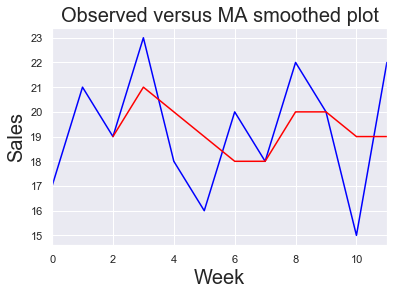

In [24]:
# plot the MA-3 graph

fc_data.sales.plot(color='blue')
fc_data.sales.rolling(maper).mean().plot(color='red')
plt.xlabel('Week', fontsize=20)
plt.ylabel('Sales', fontsize = 20)
plt.title('Observed versus MA smoothed plot', fontsize=20)

In [16]:
# Prepare forecast table for MA 3 method.

df = pd.DataFrame()

for i in range(maper,len(fc_data)):
     week = fc_data.week[i]
     actual = fc_data.sales[i]
     forecast = ma3[i-1]
     error    = actual - forecast
     abs_error = np.abs(error)
     sq_error = error * error
     perc_error = error/actual*100
     abs_perc = np.abs(perc_error)
     dfrow = pd.DataFrame({'actual':actual,
                           'forecast': forecast,
                           'error': error,
                           'absolute error': abs_error,
                           'squared error': sq_error,
                           'percent error': perc_error,
                           'abs perc error': abs_perc},
                           index = ['week' + str(i)])
     df = df.append(dfrow)
df

,actual,forecast,error,absolute error,squared error,percent error,abs perc error
week3,23,19.0,4.0,4.0,16.0,17.391304,17.391304
week4,18,21.0,-3.0,3.0,9.0,-16.666667,16.666667
week5,16,20.0,-4.0,4.0,16.0,-25.000000,25.000000
week6,20,19.0,1.0,1.0,1.0,5.000000,5.000000
week7,18,18.0,0.0,0.0,0.0,0.000000,0.000000
week8,22,18.0,4.0,4.0,16.0,18.181818,18.181818
week9,20,20.0,0.0,0.0,0.0,0.000000,0.000000
week10,15,20.0,-5.0,5.0,25.0,-33.333333,33.333333
week11,22,19.0,3.0,3.0,9.0,13.636364,13.636364


In [17]:
# compute and print accuracy measures -  mae, mse, rmse, mape.

mae = np.mean(df['absolute error'])
mse = np.mean(df['squared error'])
mape = np.mean(df['abs perc error'])

print ('mae = ', mae)
print ('mse = ', mse)
print ('rmse = ', np.sqrt(mse))
print ('mape = ', mape)


mae =  2.6666666666666665
mse =  10.222222222222221
rmse =  3.197221015541813
mape =  14.356609574000878


Comparing we see that moving average method is superior as it has lesser mae, mse and mape errors.

Text(0.5, 1.0, 'Observed versus Exp smoothed plot')

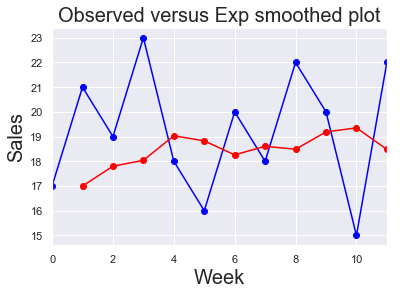

In [18]:
alpha = 0.2
sesfit = SimpleExpSmoothing(fc_data['sales']).fit(smoothing_level=0.2, optimized = False)
sesfc = sesfit.forecast()
# plot
fc_data.sales.plot(marker = 'o', color='blue')
sesfit.fittedvalues[1:12].plot(marker='o',  color='red')
plt.xlabel('Week', fontsize=20)
plt.ylabel('Sales', fontsize=20)
plt.title('Observed versus Exp smoothed plot', fontsize=20)

In [19]:
# Create forecast table

df = pd.DataFrame()

for i in range(1, len(fc_data)):
     week = fc_data.week[i]
     actual = fc_data.sales[i]
     forecast = sesfit.fittedvalues[i]
     error    = actual - forecast
     abs_error = np.abs(error)
     sq_error = error * error
     perc_error = error/actual*100
     abs_perc = np.abs(perc_error)
     dfrow = pd.DataFrame({'actual':actual,
                           'forecast': forecast,
                           'error': error,
                           'absolute error': abs_error,
                           'squared error': sq_error,
                           'percent error': perc_error,
                           'abs perc error': abs_perc},
                           index = ['week' + str(i)])
     df = df.append(dfrow)
df

,actual,forecast,error,absolute error,squared error,percent error,abs perc error
week1,21,17.000000,4.000000,4.000000,16.000000,19.047619,19.047619
week2,19,17.800000,1.200000,1.200000,1.440000,6.315789,6.315789
week3,23,18.040000,4.960000,4.960000,24.601600,21.565217,21.565217
week4,18,19.032000,-1.032000,1.032000,1.065024,-5.733333,5.733333
week5,16,18.825600,-2.825600,2.825600,7.984015,-17.660000,17.660000
week6,20,18.260480,1.739520,1.739520,3.025930,8.697600,8.697600
week7,18,18.608384,-0.608384,0.608384,0.370131,-3.379911,3.379911
week8,22,18.486707,3.513293,3.513293,12.343226,15.969513,15.969513
week9,20,19.189366,0.810634,0.810634,0.657128,4.053171,4.053171
week10,15,19.351493,-4.351493,4.351493,18.935488,-29.009951,29.009951


In [20]:
# print accuracy measures

mae = np.mean(df['absolute error'])
mse = np.mean(df['squared error'])
mape = np.mean(df['abs perc error'])

print ('mae = ', mae)
print ('mse = ', mse)
print ('rmse = ', np.sqrt(mse))
print ('mape = ', mape)

mae =  2.5963390510545454
mse =  8.982230675137561
rmse =  2.997036982610919
mape =  13.402425212624566


-------------------------------- End of Lab Session ---------------------------------